<a href="https://colab.research.google.com/github/Abdullahali77/NTI_ML/blob/main/Bank_LogReg_Abdullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [10]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df.value_counts()

age  job      marital  education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
95   retired  married  secondary  no       0        no       no    telephone  1    oct    215       1         -1     0         unknown   no     1
18   student  single   primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
                                                                              13   nov    210       1          93    1         success   yes    1
                                           1944     no       no    telephone  10   aug    122       3         -1     0         unknown   no     1
                       secondary  no       5        no       no    cellular   24   aug    143       2         -1     0         unknown   no     1
                                                                                                                                               ..
19   student  single   primary    no       103      no       no    cellular   15   oct    96        2          97    2         success   no     1
                                                                              10   jul    104       2         -1     0         unknown   yes    1
                                           56       no       no    cellular   12   aug    246       1         -1     0         unknown   no     1
                                           0        no       no    cellular   4    may    72        4         -1     0         unknown   no     1
18   student  single   unknown    no       438      no       no    cellular   1    sep    425       1         -1     0         unknown   no     1
Name: count, Length: 45211, dtype: int64

In [13]:
df.education.value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [14]:
df.education.mode()

,education
0,secondary


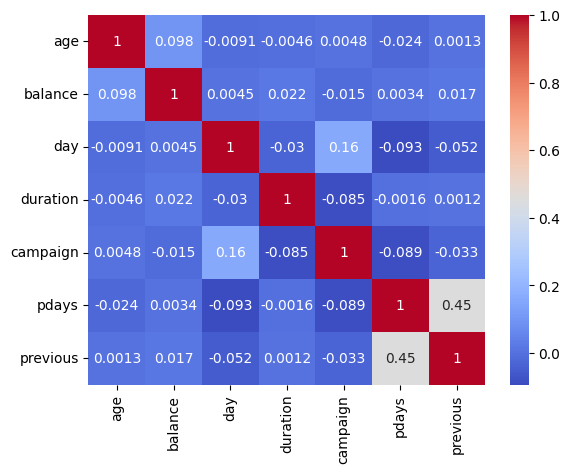

In [15]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [16]:
print(corr.abs().unstack().sort_values(ascending=False).drop_duplicates().head(3))

age    age         1.00000
pdays  previous    0.45482
day    campaign    0.16249
dtype: float64


In [17]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [18]:
df.y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [19]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

y_train = df_train.pop('y')
y_val = df_val.pop('y')
y_test = df_test.pop('y')


In [20]:
from sklearn.metrics import mutual_info_score
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
mi_scores = {col: round(mutual_info_score(df_train[col], y_train), 2)
             for col in categorical}
sorted_mi_scores = sorted(mi_scores.items(), key=lambda x: x[1],reverse=True)
sorted_mi_scores

[('poutcome', np.float64(0.03)),
 ('month', np.float64(0.02)),
 ('job', np.float64(0.01)),
 ('housing', np.float64(0.01)),
 ('contact', np.float64(0.01)),
 ('marital', np.float64(0.0)),
 ('education', np.float64(0.0))]

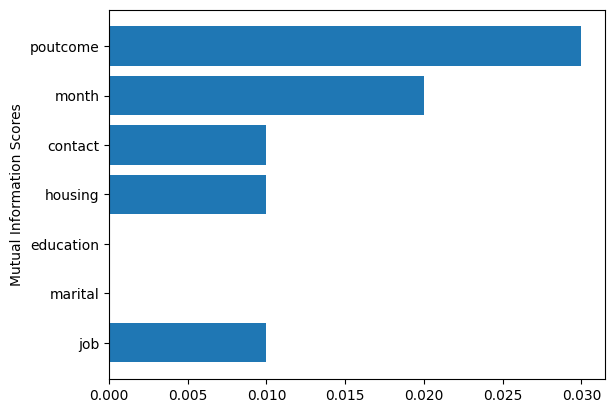

In [21]:
# plot mi scores
plt.figure()
plt.barh(range(len(mi_scores)), list(mi_scores.values()), tick_label=list(mi_scores.keys()))
plt.ylabel('Mutual Information Scores')
plt.show()

In [22]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

X_train

array([[3.900e+01, 5.900e+02, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.300e+01, 1.355e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        8.000e+00],
       [5.300e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [3.000e+01, 9.350e+02, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.500e+01, 2.123e+03, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 3.510e+02, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [23]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy = round(accuracy_score(y_val, y_pred), 2)
print(f"Validation accuracy: {accuracy}")

Validation accuracy: 0.9


In [24]:
original_acc = accuracy_score(y_val, model.predict(X_val))
feature_diff = {}
accuracies = {}

for feature in ['age', 'balance', 'marital', 'previous']:
    # Create reduced feature set
    reduced_cols = [col for col in df_train.columns if col != feature]
    df_train_reduced = df_train[reduced_cols]

    # Re-encode and train
    dv_reduced = DictVectorizer(sparse=False)
    X_train_reduced = dv_reduced.fit_transform(df_train_reduced.to_dict(orient='records'))
    X_val_reduced = dv_reduced.transform(df_val[reduced_cols].to_dict(orient='records'))

    model_reduced = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_reduced.fit(X_train_reduced, y_train)

    reduced_acc = accuracy_score(y_val, model_reduced.predict(X_val_reduced))
    accuracies[feature] = reduced_acc
    feature_diff[feature] = original_acc - reduced_acc

print(feature_diff)

{'age': 0.0005529750055297544, 'balance': -0.0012165450121655041, 'marital': -0.00044238000442375913, 'previous': -0.00022119000221187957}


In [25]:
accuracies

{'age': 0.9010174740101747,
 'balance': 0.90278699402787,
 'marital': 0.9020128290201282,
 'previous': 0.9017916390179164}

In [26]:
sorted_diffs = sorted(feature_diff.items(), key=lambda x: abs(x[1]), reverse=True)
features = [x[0] for x in sorted_diffs]
diffs = [x[1] for x in sorted_diffs]
sorted_diffs

[('balance', -0.0012165450121655041),
 ('age', 0.0005529750055297544),
 ('marital', -0.00044238000442375913),
 ('previous', -0.00022119000221187957)]

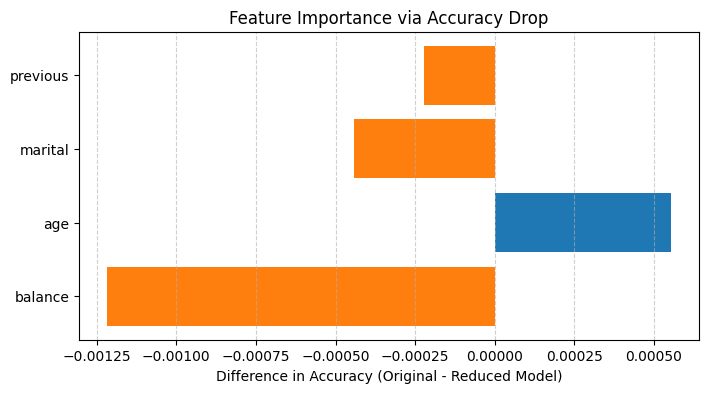

In [27]:
# Plot diff
plt.figure(figsize=(8, 4))
bars = plt.barh(features, diffs, color=['C0' if diff > 0 else 'C1' for diff in diffs])
plt.xlabel('Difference in Accuracy (Original - Reduced Model)')
plt.title('Feature Importance via Accuracy Drop')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

In [28]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

# Train models and record accuracies
for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"C = {C:<5} | Validation Accuracy = {acc}")

# Identify best C (smallest C if ties occur)
best_acc = max(accuracies)
best_C = min([C for C, acc in zip(C_values, accuracies) if acc == best_acc])
print(f"\nBest C: {best_C} (Accuracy = {best_acc})")

C = 0.01  | Validation Accuracy = 0.8980314089803141
C = 0.1   | Validation Accuracy = 0.9022340190223402
C = 1     | Validation Accuracy = 0.9015704490157045
C = 10    | Validation Accuracy = 0.9022340190223402
C = 100   | Validation Accuracy = 0.9016810440168105

Best C: 0.1 (Accuracy = 0.9022340190223402)


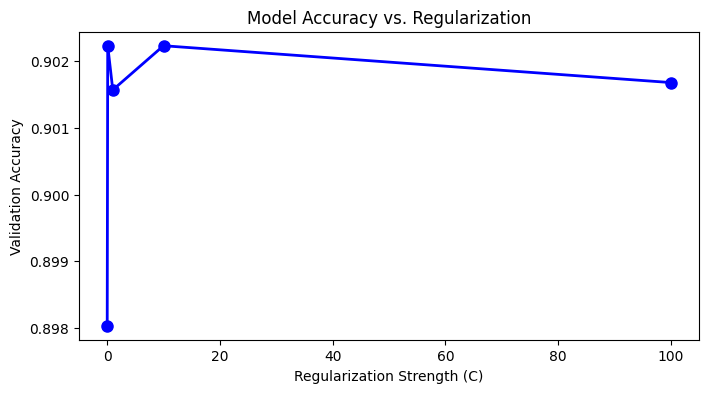

In [29]:
# Plot results
plt.figure(figsize=(8, 4))
plt.plot(C_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Validation Accuracy')
plt.title('Model Accuracy vs. Regularization')
plt.show()

In [46]:
from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score,auc,classification_report,confusion_matrix

In [41]:
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Recall: 0.3355263157894737
Precision: 0.6623376623376623


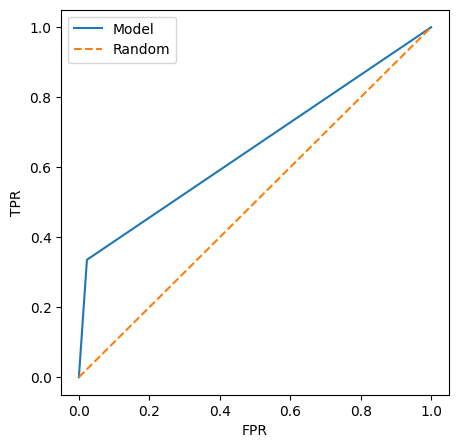

In [37]:
fpr, tpr,thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [38]:
auc(fpr, tpr)

np.float64(0.6563567903840826)

In [40]:
roc_auc_score(y_val, y_pred)

np.float64(0.6563567903840826)

In [45]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7978
           1       0.66      0.34      0.45      1064

    accuracy                           0.90      9042
   macro avg       0.79      0.66      0.70      9042
weighted avg       0.89      0.90      0.89      9042



In [48]:
print(confusion_matrix(y_val, y_pred))

[[7796  182]
 [ 707  357]]


In [50]:
print(confusion_matrix(y_val, y_pred, normalize='true'))

[[0.97718726 0.02281274]
 [0.66447368 0.33552632]]


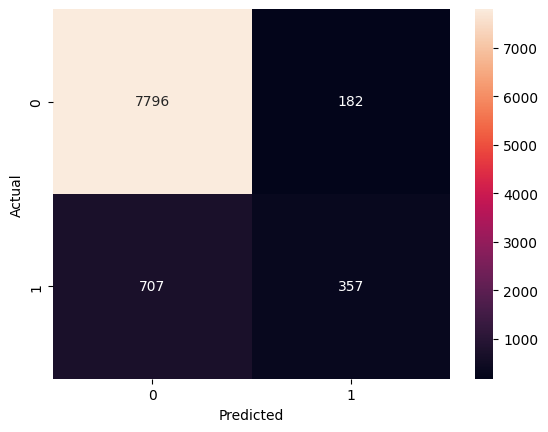

In [58]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()